In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.figsize'] = (12.75,8.5)

In [50]:
# Mazen only code
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/MyDrive/Concordia/SOEN 6611 - Measurements/Project'

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Reza only code
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/MyDrive'

In [2]:
df = pd.read_csv("./Unicorn_Companies.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [3]:
print(df.shape)
df.describe()

(1037, 13)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
count,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037,1037
unique,1035,200,623,46,256,33,1006,37,914,10,54,16,5
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,None,2015,None,None,10,1,None
freq,2,244,9,536,145,205,17,144,24,988,69,280,988


# Indicators, Base measures, and Derived measures calculation definition

## Veracity

### Length of Big Data (Lbd)

In [4]:
Lbd = df.shape[0]
print('Lbd = ' + str(Lbd))

Lbd = 1037


### Number of Duplicates

In [5]:
bool_duplicates = df.duplicated(subset='Company', keep='first')
df[bool_duplicates]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
63,Bolt,$8.4,5/29/2018,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments",2013,$1.971B,None,28,5,None
976,Fabric,$1,10/26/2021,United States,New York,"Supply chain, logistics, & delivery","Innovation Endeavors, Aleph, Temasek",1999,None,None,1,1,None


In [6]:
display( df[df['Company'] == 'Bolt'] )
display( df[df['Company'] == 'Fabric'] )

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
37,Bolt,$11,10/8/2021,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic",2014,$963M,None,37,3,None
63,Bolt,$8.4,5/29/2018,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments",2013,$1.971B,None,28,5,None


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
578,Fabric,$1.5,2/24/2022,United States,Bellevue,E-commerce & direct-to-consumer,"Redpoint Ventures, Norwest Venture Partners, S...",2017,$292.58M,None,11,2,None
976,Fabric,$1,10/26/2021,United States,New York,"Supply chain, logistics, & delivery","Innovation Endeavors, Aleph, Temasek",1999,None,None,1,1,None


In [7]:
def num_duplicates(df):
    bool_duplicates = df.duplicated(keep='first')
    num_dup = df[bool_duplicates].shape[0]
    return num_dup

print('The number of duplicates = ' + str(num_duplicates(df)))

The number of duplicates = 0


### Accuracy

In [8]:
def hacc(Lbd, num_dup): 
    # Hacc(MDS) = log2(Lbd) – (1 / Lbd) x ∑j={1…k}pj log2 (pj)
    Hacc = math.log(Lbd, 2) - ((1 / Lbd) * num_dup * math.log(num_dup, 2))
    return Hacc

In [9]:
def hmax(Lbd):
    return math.log(Lbd, 2)

In [10]:
def accuracy(Lbd, num_dup):
    Hmax = hmax(Lbd)
    if num_dup == 0:
        Hacc = Hmax
    else:
        Hacc = hacc(Lbd,num_dup)
    accuracy = Hacc / Hmax
    return accuracy

accuracy(Lbd, num_duplicates(df))

1.0

### Currentness

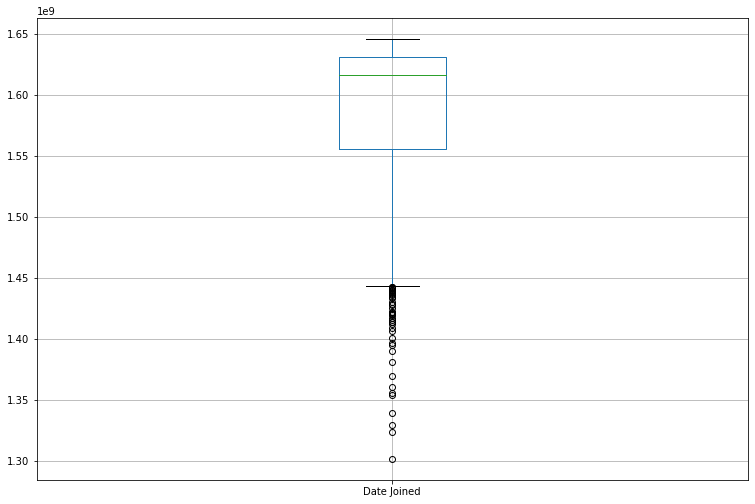

In [11]:
df["Date Joined"] = pd.to_datetime(df["Date Joined"]).astype('int64') // 10**9
df[df["Founded Year"] == "None"] = None
df["Founded Year"] = pd.to_datetime(df["Founded Year"]).astype('int64') // 10**9

df.boxplot(column =['Date Joined'])

In [12]:
def currentness(df, Lbd):
    df_copy = df.copy()
    
    df_copy['Date Joined'] = pd.to_datetime(df_copy['Date Joined']).astype('int64') // 10**9
    quantiles = df_copy.quantile([0.25, 0.5, 0.75])
    lower_quartile = quantiles.iloc[0]['Date Joined']
    upper_quartile = quantiles.iloc[2]['Date Joined']
    acceptable_age = df_copy.shape[0] - (df_copy[df_copy['Date Joined'] < lower_quartile].shape[0] + df_copy[df_copy['Date Joined'] > upper_quartile].shape[0])
    currentness = acceptable_age / Lbd
    return currentness

currentness(df, Lbd)

0.9585342333654774

### Completeness

In [13]:
def completeness(df): 
    df_n = df[~df.isna().any(axis=1)]
    return len(df_n)/len(df)

completeness(df)

0.9585342333654774

### Availability
Because the system is not deployed, we cannot know the number of successful requests and the total number of requests, so we will set availability to 0.

In [14]:
availability = 0

### Veracity

In [15]:
def veracity(df):
    w_acc = 1/4
    w_comp = 1/4
    w_cur = 1/4
    w_avail = 1/4

    veracity = accuracy(Lbd, num_duplicates(df)) * w_acc + completeness(df) * w_comp + currentness(df, Lbd) * w_cur + availability * w_avail 
    return veracity

veracity(df)

0.7238171193876914

## Validity

### Number of Datasets (NDS)

In [16]:
Nds = 1

### Credibility

Assume that the source for each of the datasets are credible

In [17]:
def credibility():
    Nds_cr = Nds
    return Nds_cr / Nds
credibility()

1.0

### Compliance
Assume that we are not compliant with countries that have their 'Industry' as 'Other'

In [18]:
def compliance(df, Nds):
    Nrec_comp = df[df["Industry"] == "Other"].shape[0]
    return Nrec_comp / Nds

compliance(df, Nds)

54.0

### Validity

In [19]:
def validity(df, Nds=1):
    w_cred = 1/2
    w_comp = 1/2
    return credibility() * w_cred + compliance(df, Nds) * w_comp

validity(df, Nds)

27.5

## Vincularity

### Traceability

In [20]:
def traceability(df, Nds=1):
    Ldst = len(df)
    df2 = df.loc[(df['Industry'] == 'Other') 
              | (df['Select Inverstors'].isin(['None','']))
              | (df['Founded Year'].isin(['None','']))
             ]

    Rec_trace = len(df) - len(df2)
    return Rec_trace/Ldst

### Vincularity

In [21]:
def vincularity(MDS , Nds):
    traceabilities = 0
    for i in MDS: 
        traceabilities += traceability(i, Nds)
    return traceabilities/Nds

In [22]:
MDS = [df]
vincularity(MDS, Nds)

0.9324975891996142

# Indicators calculation

In [23]:
def get_indicators(df):
    Mver = veracity(df)
    Mval = validity(df, Nds)
    Mvin = vincularity([df], Nds)
    print("Mver = " + str(Mver) + ", Mval = " + str(Mval) + ", Mvin = " + str(Mvin))
    return Mver, Mval, Mvin

# Data Extraction

In [24]:
def extract_data(df):
    df1 = df.iloc[0 : int(len(df)/3), :]
    df2 = df.iloc[: int(2*len(df)/3), :] # data from int(len(df)/3) : int(2*len(df)/3) has been added
    df3 = df.iloc[:, :]  # data from int(2*len(df)/3) to end has been added
    return df1, df2, df3

In [25]:
(df1, df2, df3) = extract_data(df)
get_indicators(df1)
get_indicators(df2)
get_indicators(df3)

Mver = 0.5717503227516691, Mval = 7.5, Mvin = 0.9478260869565217
Mver = 0.6481178007661814, Mval = 18.0, Mvin = 0.9406657018813314
Mver = 0.7238171193876914, Mval = 27.5, Mvin = 0.9324975891996142


(0.7238171193876914, 27.5, 0.9324975891996142)

# Data preprocessing

In [26]:
def preprocess(df):
    df_pre = df.copy()
    
    # replace all "None" with None
    df_pre = df_pre.replace(to_replace = "None", value =None)
    
    # convert date strings to pandas date
    df_pre["Date Joined"] = pd.to_datetime(df_pre["Date Joined"])
    df_pre["Founded Year"] = pd.to_datetime(df_pre["Founded Year"])
    
    # Convert valuation from string to float
    df_pre["Valuation ($B)"] = df_pre["Valuation ($B)"].replace({"\$": ""}, regex=True)
    df_pre["Valuation ($B)"] = df_pre["Valuation ($B)"].astype(float)
    
    
    unite = df_pre["Total Raised"].str[-1]

    df_pre["Total Raised"] = df_pre["Total Raised"].replace({"\$": "", "B$": "", "M$": "", "None": np.nan, "K$": ""}, regex=True).astype(float)

    for i, row in df_pre.iterrows():
        if unite[i] == "B":
            df_pre.loc[i, "Total Raised"] = row["Total Raised"] * int(1e9)
        elif unite[i] == "M":
            df_pre.loc[i, "Total Raised"] = row["Total Raised"] * int(1e6)
        elif unite[i] == "K":
            df_pre.loc[i, "Total Raised"] = row["Total Raised"] * int(1e3)

    # remove columns with too manu null values "Portfolio Exits" and "Financial Stage"
    df_pre = df_pre.drop(["Financial Stage","Portfolio Exits"], axis=1)
    return df_pre

In [27]:
df1_pre = preprocess(df1)
get_indicators(df1_pre)

Mver = 0.564503945940075, Mval = 7.5, Mvin = 0.9594202898550724


(0.564503945940075, 7.5, 0.9594202898550724)

In [28]:
def process(df):
    df_pro = df.copy()
    
    df_pro["Country"] = df_pro["Country"].astype('category')
    df_pro["City"] = df_pro["City"].astype('category')
    df_pro["Industry"] = df_pro["Industry"].astype('category')
    
    # normalize columns
    unnormalized_cols = ["Valuation ($B)", "Total Raised"]
    df_pro[unnormalized_cols] = df_pro[unnormalized_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    return df_pro

### Results of derive measures 

In [29]:
def extract_drive_measures(all_dfs): # {"T1": [df1, df1_pro, df1_pre], . . .
    columns = ['Extraction' , 'Preprocessing', 'Processing']

    for k in all_dfs: # keys T1,T2,T3
        df_res = pd.DataFrame(columns = columns,
                              index=['Compliance', 
                                     'Credibility', 
                                     'Traceability', 
                                     'Hacc', 
                                     'Hmax', 
                                     'Currentness', 
                                     'Completeness', 
                                     'Availability'])
        
        for i, s in enumerate(all_dfs[k]): 
            data = np.array(
                [compliance(s, Nds),
                 credibility(),
                 traceability(s),
                 hacc(s.shape[0],num_duplicates(s)), 
                 hmax(s.shape[0]),
                 accuracy(s.shape[0],num_duplicates(s)), 
                 currentness(s,s.shape[0]), 
                 0])
            df_res[columns[i]] = data.tolist()
        print(f"time frame: {k}")
        display(df_res)


# Data Pipeline (Data Extraction, Data Preprocessing, Data Processing)

In [39]:
def pipeline(df, Nds = 1):
    (df1, df2, df3) = extract_data(df)
    
    # Time frame 1
    (Mver1_ext, Mval1_ext, Mvin1_ext) = get_indicators(df1)
    
    df1_pre = preprocess(df1)
    (Mver1_pre, Mval1_pre, Mvin1_pre) = get_indicators(df1_pre)
    
    df1_pro = process(df1_pre)
    (Mver1_pro, Mval1_pro, Mvin1_pro) = get_indicators(df1_pro)
    
    # Time frame 2
    (Mver2_ext, Mval2_ext, Mvin2_ext) = get_indicators(df2)
    
    df2_pre = preprocess(df2)
    (Mver2_pre, Mval2_pre,  Mvin2_pre) = get_indicators(df2_pre)
    
    df2_pro = process(df2_pre)
    (Mver2_pro, Mval2_pro, Mvin2_pro) = get_indicators(df2_pro)
    
    # Time frame 3
    (Mver3_ext, Mval3_ext, Mvin3_ext) = get_indicators(df3)
    
    df3_pre = preprocess(df3)
    (Mver3_pre, Mval3_pre, Mvin3_pre) = get_indicators(df3_pre)
    
    df3_pro = process(df3_pre)
    (Mver3_pro, Mval3_pro, Mvin3_pro) = get_indicators(df3_pro)
    
    
    
    all_dfs = {"T1": [df1, df1_pro, df1_pre],
               "T2": [df2, df2_pro, df2_pre], 
               "T3": [df3, df3_pro, df3_pre]}

    # extract tables for each time frame
    extract_drive_measures(all_dfs)
    
    # plot the indicators
    data_ver = [
        [Mver1_ext, Mver2_ext, Mver3_ext],
        [Mver1_pre, Mver2_pre, Mver3_pre],
        [Mver1_pro, Mver2_pro, Mver3_pro],
    ]
    
    
    data_val = [
        [Mval1_ext, Mval2_ext, Mval3_ext],
        [Mval1_pre, Mval2_pre, Mval3_pre],
        [Mval1_pro, Mval2_pro, Mval3_pro],
    ]
    
    data_vin = [
        [Mvin1_ext, Mvin2_ext, Mvin3_ext],
        [Mvin1_pre, Mvin2_pre, Mvin3_pre],
        [Mvin1_pro, Mvin2_pro, Mvin3_pro]
    ]
    
    
    # tables of result
    df_ver = pd.DataFrame(data_ver, columns = ['Extraction' , 'Preprocessing', 'Processing'],
                          index=['T1', 'T2', 'T3'])
    df_val = pd.DataFrame(data_val, columns = ['Extraction' , 'Preprocessing', 'Processing'],
                          index=['T1', 'T2', 'T3'])
    df_vin = pd.DataFrame(data_vin, columns = ['Extraction' , 'Preprocessing', 'Processing'],
                          index=['T1', 'T2', 'T3'])
    
    plotIndicator(df_ver, 'Veracity')
    plotIndicator(df_val, 'Validity')
    plotIndicator(df_vin, 'Vincularity')
    
    df_ver['Average'] = df_ver.mean(axis=1)
    df_val['Average'] = df_val.mean(axis=1)
    df_vin['Average'] = df_vin.mean(axis=1)
    
    display(df_ver)
    display(df_val)
    display(df_vin)

In [40]:
def plotIndicator(data, title):
    data.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Time frame")


Mver = 0.5717503227516691, Mval = 7.5, Mvin = 0.9478260869565217
Mver = 0.564503945940075, Mval = 7.5, Mvin = 0.9594202898550724
Mver = 0.564503945940075, Mval = 7.5, Mvin = 0.9594202898550724
Mver = 0.6481178007661814, Mval = 18.0, Mvin = 0.9406657018813314
Mver = 0.6383493492466444, Mval = 18.0, Mvin = 0.9493487698986975
Mver = 0.6383493492466444, Mval = 18.0, Mvin = 0.9493487698986975
Mver = 0.7238171193876914, Mval = 27.5, Mvin = 0.9324975891996142
Mver = 0.7122452775361968, Mval = 27.5, Mvin = 0.9479267116682739
Mver = 0.7122452775361968, Mval = 27.5, Mvin = 0.9479267116682739
time frame: T1


,Extraction,Preprocessing,Processing
Compliance,14.000000,14.000000,14.000000
Credibility,1.000000,1.000000,1.000000
Traceability,0.947826,0.959420,0.959420
Hacc,8.334165,8.334165,8.334165
Hmax,8.430453,8.430453,8.430453
Currentness,0.988579,0.988579,0.988579
Completeness,0.968116,0.968116,0.968116
Availability,0.000000,0.000000,0.000000


time frame: T2


,Extraction,Preprocessing,Processing
Compliance,35.000000,35.000000,35.000000
Credibility,1.000000,1.000000,1.000000
Traceability,0.940666,0.949349,0.949349
Hacc,9.264530,9.264530,9.264530
Hmax,9.432542,9.432542,9.432542
Currentness,0.982188,0.982188,0.982188
Completeness,0.962373,0.962373,0.962373
Availability,0.000000,0.000000,0.000000


time frame: T3


,Extraction,Preprocessing,Processing
Compliance,54.000000,54.000000,54.000000
Credibility,1.000000,1.000000,1.000000
Traceability,0.932498,0.947927,0.947927
Hacc,9.799804,9.799804,9.799804
Hmax,10.018200,10.018200,10.018200
Currentness,0.978200,0.978200,0.978200
Completeness,0.958534,0.958534,0.958534
Availability,0.000000,0.000000,0.000000


,Extraction,Preprocessing,Processing,Average
T1,0.571750,0.648118,0.723817,0.647895
T2,0.564504,0.638349,0.712245,0.638366
T3,0.564504,0.638349,0.712245,0.638366


,Extraction,Preprocessing,Processing,Average
T1,7.5,18.0,27.5,17.666667
T2,7.5,18.0,27.5,17.666667
T3,7.5,18.0,27.5,17.666667


,Extraction,Preprocessing,Processing,Average
T1,0.947826,0.940666,0.932498,0.940330
T2,0.959420,0.949349,0.947927,0.952232
T3,0.959420,0.949349,0.947927,0.952232


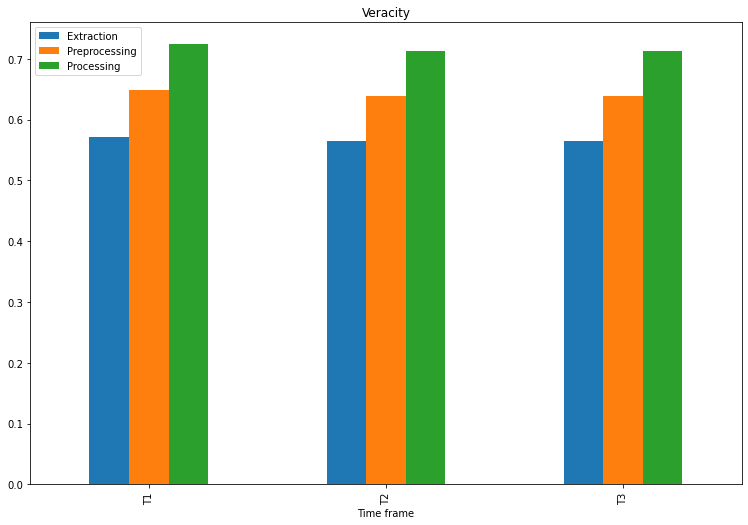

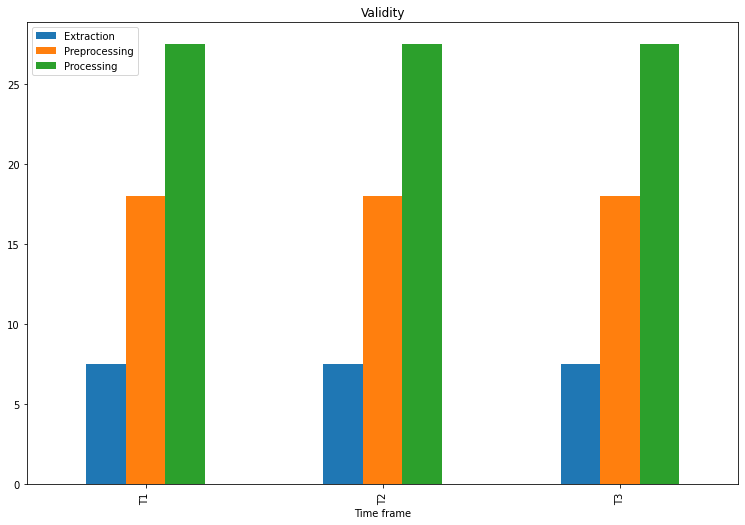

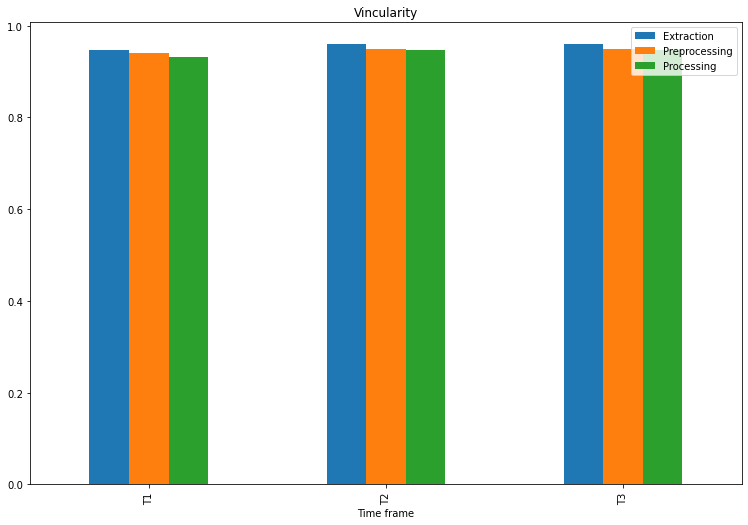

In [41]:
pipeline(df)